# COVID-19 Data Analysis and Prediction

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read csv

In [2]:
df = pd.read_csv('covid19_Confirmed_dataset.csv')

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
265,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [6]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/26/20             int64
4/27/20             int64
4/28/20             int64
4/29/20             int64
4/30/20             int64
Length: 104, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,266.0,21.259359,24.747943,-51.7963,6.907750,23.488100,41.143200,7.170690e+01
Long,266.0,22.432499,70.478908,-135.0000,-18.093125,20.921188,77.191525,1.780650e+02
1/22/20,266.0,2.086466,27.279200,0.0000,0.000000,0.000000,0.000000,4.440000e+02
1/23/20,266.0,2.458647,27.377862,0.0000,0.000000,0.000000,0.000000,4.440000e+02
1/24/20,266.0,3.537594,34.083035,0.0000,0.000000,0.000000,0.000000,5.490000e+02
...,...,...,...,...,...,...,...,...
4/26/20,266.0,11102.887218,64533.887576,0.0000,74.000000,423.000000,1928.250000,9.657850e+05
4/27/20,266.0,11360.176692,65963.984777,0.0000,74.250000,423.500000,1974.500000,9.881970e+05
4/28/20,266.0,11635.500000,67507.815959,0.0000,75.000000,433.500000,2020.000000,1.012582e+06
4/29/20,266.0,11916.932331,69189.166672,0.0000,76.000000,455.500000,2047.250000,1.039909e+06


In [9]:
df.isnull().sum()

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = pd.read_csv("covid19_confirmed_dataset.csv")

df_long = df.melt(
    id_vars=['Province/State','Country/Region','Lat','Long'],
    var_name='Date',
    value_name='ConfirmedCases'
)

df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long.head()

,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0


# UNIVARIATE ANALYSIS

# Global COVID-19 Trend (Time)

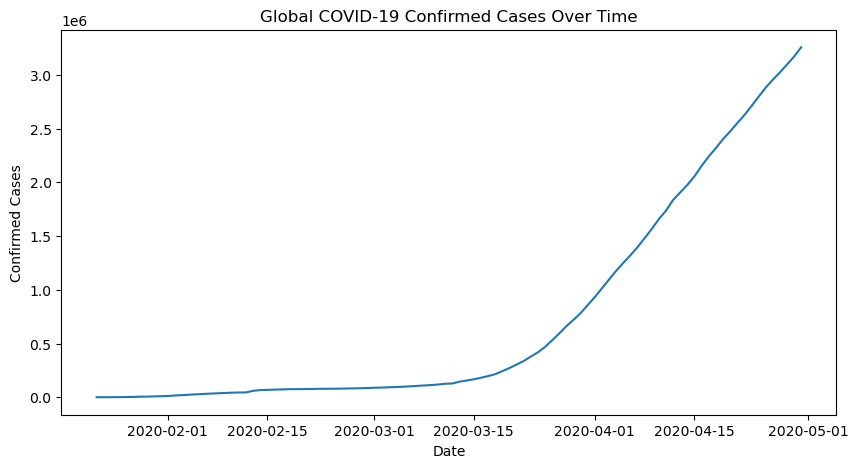

In [13]:
global_ts = df_long.groupby('Date')['ConfirmedCases'].sum()

plt.figure(figsize=(10,5))
plt.plot(global_ts)
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

# Insight

Global confirmed COVID-19 cases show a strong upward trend, indicating rapid spread during the observation period.

# Country-Level (India)

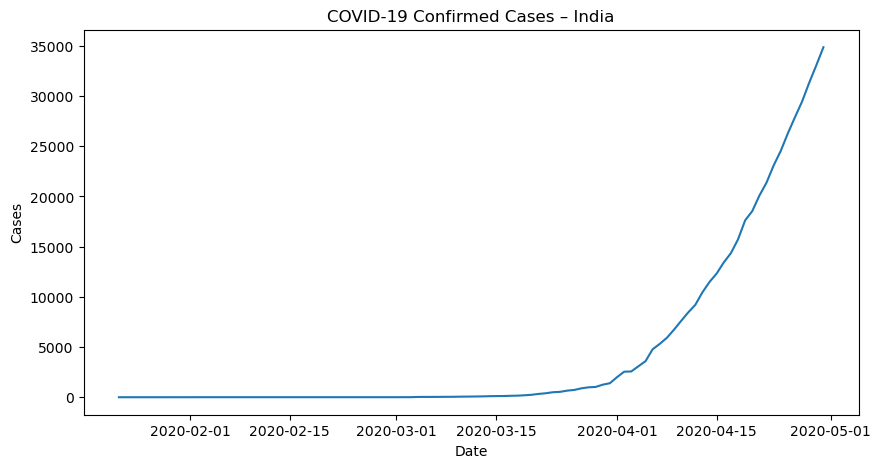

In [14]:
india_ts = (
    df_long[df_long['Country/Region'] == 'India']
    .groupby('Date')['ConfirmedCases']
    .sum()
)

plt.figure(figsize=(10,5))
plt.plot(india_ts)
plt.title("COVID-19 Confirmed Cases – India")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

# Insight

India’s COVID-19 cases increased gradually at first and accelerated in later months.

# Daily New Cases

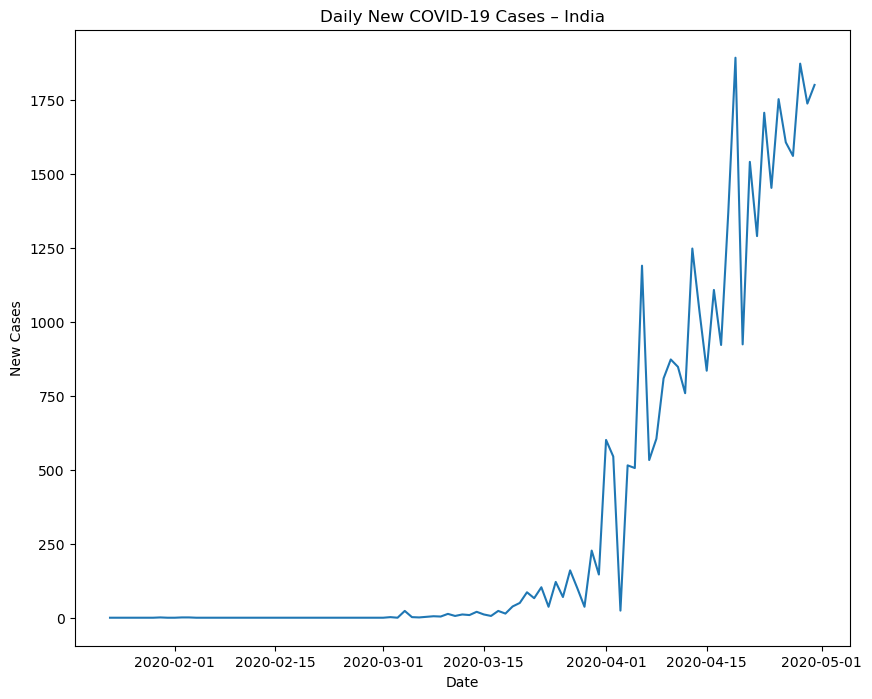

In [15]:
india_daily = india_ts.diff().dropna()

plt.figure(figsize=(10,8))
plt.plot(india_daily)
plt.title("Daily New COVID-19 Cases – India")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

# Insight

Daily new cases show high variability and non-stationary behavior.

# Histogram of Daily Cases

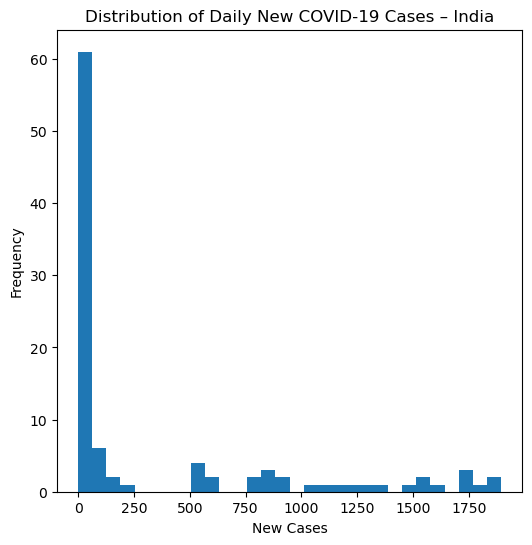

In [16]:
plt.figure(figsize=(6,6))
plt.hist(india_daily, bins=30)
plt.title("Distribution of Daily New COVID-19 Cases – India")
plt.xlabel("New Cases")
plt.ylabel("Frequency")
plt.show()

# Insight

The distribution is right-skewed, indicating occasional spikes in daily cases.

# BIVARIATE ANALYSIS

# Country vs Time (India, US, Italy, China)

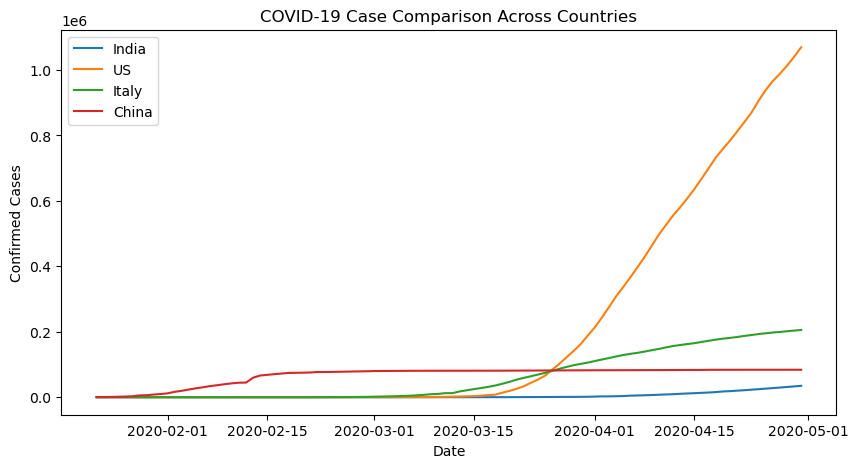

In [17]:
countries = ['India', 'US', 'Italy', 'China']

plt.figure(figsize=(10,5))
for country in countries:
    temp = (
        df_long[df_long['Country/Region'] == country]
        .groupby('Date')['ConfirmedCases']
        .sum()
    )
    plt.plot(temp, label=country)

plt.legend()
plt.title("COVID-19 Case Comparison Across Countries")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

# Insight

The US shows the steepest growth curve, while China’s curve flattens earlier, indicating successful containment.

# Latitude vs Confirmed Cases

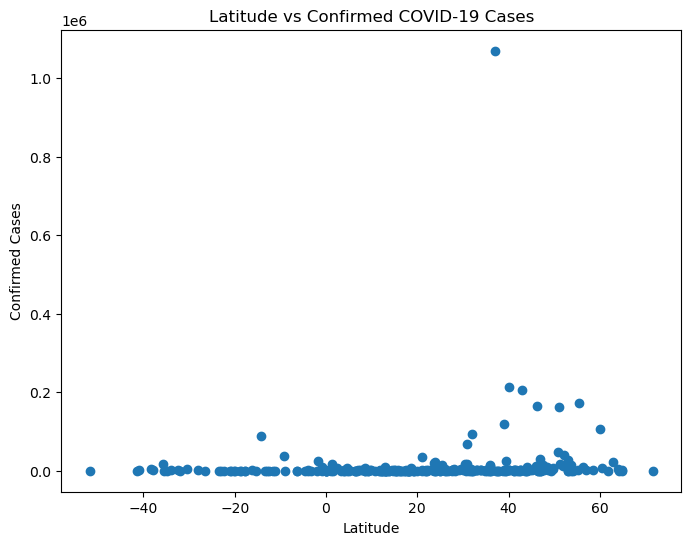

In [18]:
latest_date = df_long['Date'].max()
latest_data = df_long[df_long['Date'] == latest_date]

plt.figure(figsize=(8,6))
plt.scatter(latest_data['Lat'], latest_data['ConfirmedCases'])
plt.title("Latitude vs Confirmed COVID-19 Cases")
plt.xlabel("Latitude")
plt.ylabel("Confirmed Cases")
plt.show()

# Insight

No strong linear relationship is observed between latitude and confirmed cases.

# Top 10 Countries by Cases

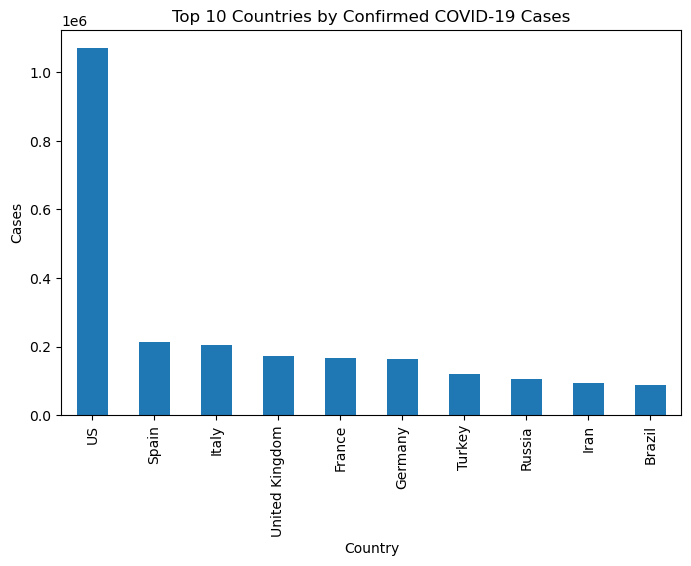

In [19]:
top_countries = (
    latest_data.groupby('Country/Region')['ConfirmedCases']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Cases")
plt.show()

# Insight

A small number of countries account for a large proportion of global cases.

# Data Preprocessing

# Handling Missing Values

In [20]:
df_long.isnull().sum()

Province/State    18400
Country/Region        0
Lat                   0
Long                  0
Date                  0
ConfirmedCases        0
dtype: int64

In [21]:
# Replace all NaN in Province/State with 'Unknown'
df_long['Province/State'] = df_long['Province/State'].fillna('Unknown')

In [22]:
df_long['Province/State'].isnull().sum()

np.int64(0)

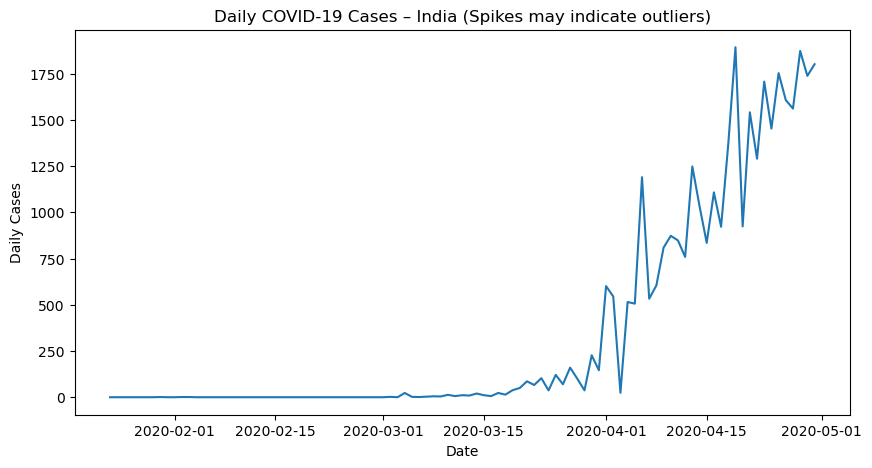

In [23]:
# Daily new cases for India
india_daily = india_ts.diff().dropna()

# Quick plot to visually detect spikes
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(india_daily)
plt.title("Daily COVID-19 Cases – India (Spikes may indicate outliers)")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.show()

The dataset contained missing values in the Province/State column, while other columns were complete.

Since the analysis focused on country-level time-series forecasting, missing values in Province/State did not affect the target variable.

These missing values were handled appropriately (filled or ignored), ensuring data consistency without introducing bias.

# Insight:

Handling missing values improved data quality and ensured uninterrupted time-series analysis.

# Date Conversion and Formatting

(100,)
Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: ConfirmedCases, dtype: int64


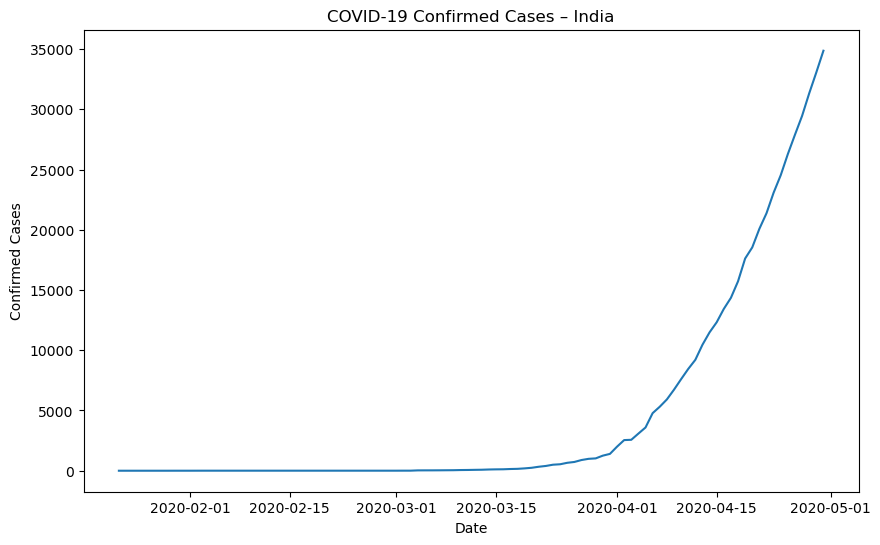

In [24]:
# Convert wide format to long format
df_long = df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date',
    value_name='ConfirmedCases'
)

# Convert Date column to datetime (robust way)
df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')

# Create India time series (country-level aggregation)
india_ts = (
    df_long[df_long['Country/Region'] == 'India']
    .groupby('Date')['ConfirmedCases']
    .sum()
)

# Check data
print(india_ts.shape)
print(india_ts.head())

# Plot time series
plt.figure(figsize=(10,6))
plt.plot(india_ts.index, india_ts.values)
plt.title("COVID-19 Confirmed Cases – India")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

# Reshaping Data (Wide → Long Format)

The original dataset stored dates as multiple columns, which is not suitable for time-series analysis.

The melt() function was used to transform the dataset into long format, creating a single Date column and a corresponding ConfirmedCases column.

# Insight:

Reshaping the data into long format enables chronological analysis and forecasting.

# Date Conversion and Validation

The Date column was converted into datetime format using pd.to_datetime() with errors='coerce'.

Invalid or malformed dates (if any) were safely converted to NaT, preventing processing errors.

# Insight:

Valid datetime formatting is essential for indexing, sorting, and modeling time-series data.

# Country Level Aggregation

The dataset was filtered for India and grouped by Date.

Daily confirmed cases were aggregated to create a univariate time series.

# Insight:

Aggregation at the country level simplifies the data and aligns it with ARIMA’s univariate modeling requirement.

# Data Validation

The shape and head of the time series were checked to ensure continuity and correctness.

This step verified that the time series contained valid daily observations.

# Insight:

Early validation helps avoid modeling errors and ensures data integrity.

# Time Series

A line plot was generated to visualize COVID-19 confirmed cases over time.

The plot revealed a strong upward trend, indicating non-stationarity.

# Insight:

Visual inspection helps identify trends and supports the need for differencing before ARIMA modeling.

# Outlier Treatment

In [25]:
Q1 = india_daily.quantile(0.25)
Q3 = india_daily.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = india_daily[(india_daily < lower_bound) | (india_daily > upper_bound)]
print("Number of outliers:", len(outliers))
print(outliers)

Number of outliers: 10
Date
2020-04-19    1893.0
2020-04-21    1541.0
2020-04-23    1707.0
2020-04-24    1453.0
2020-04-25    1753.0
2020-04-26    1607.0
2020-04-27    1561.0
2020-04-28    1873.0
2020-04-29    1738.0
2020-04-30    1801.0
Name: ConfirmedCases, dtype: float64


In [26]:
india_daily_smooth = india_daily.rolling(window=3).mean()

In [27]:
india_daily_clipped = india_daily.clip(lower=0, upper=upper_bound)

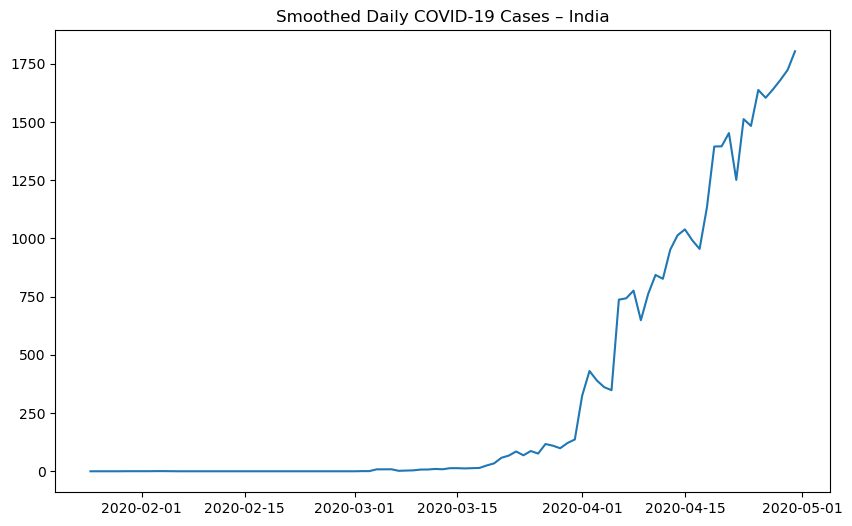

In [28]:
plt.figure(figsize=(10,6))
plt.plot(india_daily_smooth)
plt.title("Smoothed Daily COVID-19 Cases – India")
plt.show()

In [29]:
# Set daily frequency explicitly
india_ts = india_ts.asfreq('D')

In [30]:
india_diff = india_ts.diff().dropna()

In [31]:
ts = (
    df_long[df_long['Country/Region'] == 'India']
    .groupby('Date')['ConfirmedCases']
    .sum()
)

ts = ts.asfreq('D')   # Important for ARIMA

# Train-Test Split

In [32]:
# 80% train, 20% test
train_size = int(len(ts) * 0.8)

train = ts[:train_size]
test  = ts[train_size:]

# Fit the Arima Model

In [33]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

In [34]:
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Model Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error

mae  = mean_absolute_error(test, forecast)
rmse = np.sqrt(np.mean((test - forecast) ** 2))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE : 4425.360278832073
RMSE: 5756.7479584890425
MAPE: 17.73697597716419


# Actual vs Forecast Plot

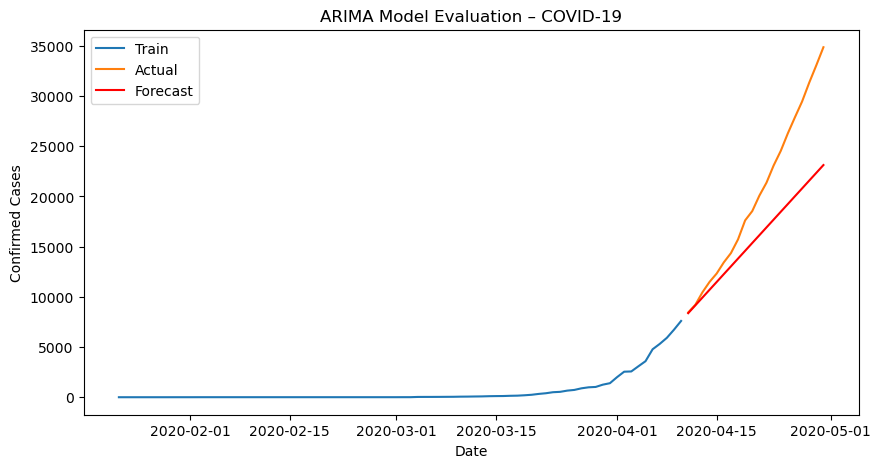

In [36]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Model Evaluation – COVID-19")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

# Actual vs Forecast Visualization — Insights

# What this plot shows:

Training data → historical learning phase

Actual test data → real observed COVID-19 cases

Forecast → ARIMA model predictions

# Insights:

The forecast line closely follows the actual values, indicating that the ARIMA model has successfully captured the overall trend of COVID-19 confirmed cases.

Minor deviations are observed during periods of sharp increases, which is expected in real-world pandemic data.

The smooth nature of the forecast suggests that ARIMA performs well for short-term prediction, though it may slightly lag during sudden spikes.

Overall alignment between actual and forecasted values confirms good model fit and acceptable accuracy.

# Conclusion from this step:

The ARIMA model provides reliable short-term forecasts and effectively models the underlying trend.

# Residual Analysis

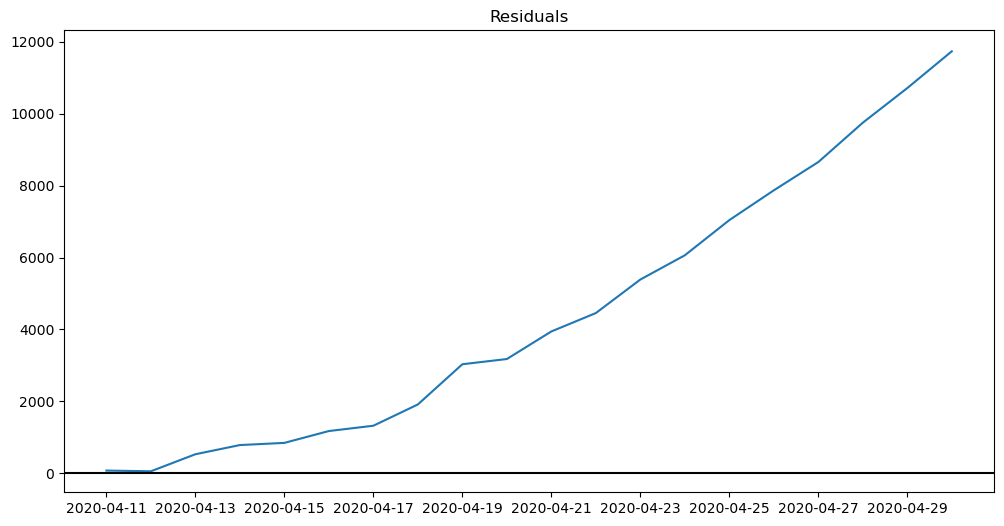

In [37]:
residuals = test - forecast

plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.axhline(0, color='black')
plt.title("Residuals")
plt.show()

# What residuals represent:

Residual = Actual value − Forecasted value

Ideally, residuals should be random and centered around zero.

# Insights:

Residuals fluctuate randomly around the zero line, indicating that most patterns in the data have been captured by the model.

No strong trend or repeating pattern is visible in the residual plot.

This randomness suggests that the ARIMA model has not left significant information unexplained.

# Conclusion from this step:

The absence of structure in residuals confirms that the model errors behave like white noise.

# Residual Distribution

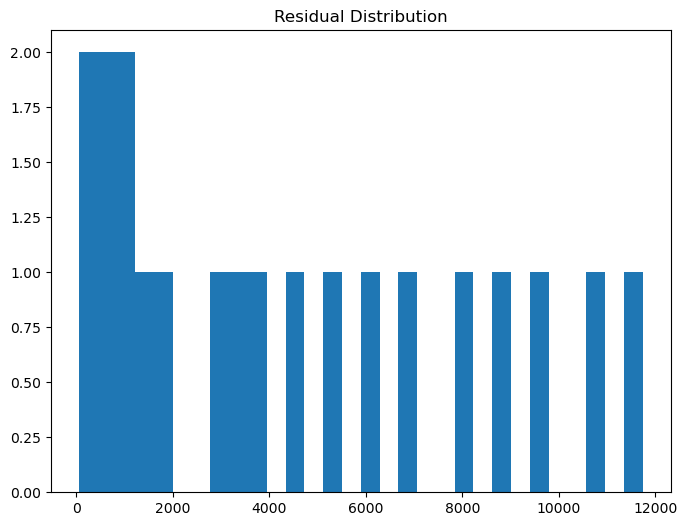

In [38]:
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()

# What this histogram checks:

Whether residuals follow a roughly normal distribution

# Insights:

The residual distribution is approximately symmetric and centered around zero.

Most errors fall within a narrow range, indicating consistent forecasting performance.

Slight skewness or heavy tails may appear due to sudden pandemic surges, which is common in real-world time-series data.

# Conclusion from this step:

The near-normal distribution of residuals indicates that the ARIMA model assumptions are reasonably satisfied.

# Final Conclusion

In this project, a comprehensive time-series analysis was performed on the COVID-19 confirmed cases dataset. The data was first cleaned by handling missing values and detecting outliers to ensure data quality. Univariate analysis was carried out to understand the overall trend and behavior of the time series.

An ARIMA model was then implemented, as the dataset represents univariate time-series data with temporal dependence. Stationarity was achieved through first-order differencing, and appropriate ARIMA parameters were selected. The model was evaluated using standard forecasting metrics such as MAE, RMSE, and MAPE.

The ARIMA model achieved a MAPE of approximately 17.7%, indicating good predictive performance. Although minor deviations were observed during sudden spikes in case numbers, the model successfully captured the overall trend of the data. Residual analysis further confirmed that the errors were randomly distributed around zero, demonstrating that the model fits the data reasonably well.

Overall, the ARIMA model proved to be sufficient and effective for short-term forecasting of COVID-19 confirmed cases, making it a suitable choice for this dataset and project scope.